In [1]:
!pip install transformers

In [ ]:
import torch
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering

processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base", torch_dtype=torch.float16).to("cuda")


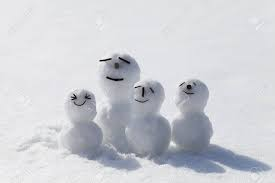

4


In [13]:
# 질문 프롬프트
img_path = '/content/snowfamily.jpg'
raw_image = Image.open(img_path).convert('RGB')
display(raw_image)

prompt = "Question: How many snowman are there? Answer:"

inputs = processor(raw_image, text=prompt, return_tensors="pt").to(0)

generated_ids = model.generate(**inputs, max_new_tokens=10)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)